<a href="https://colab.research.google.com/github/mariafadilla15/MachineLearning_Ganjil_2023/blob/main/kuis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KUIS 1 - MACHINE LEARNING**
#**TI - 3D**

## **Nama Anggota Kelompok 8**:

1. Maria Fadilla ( 15 / 2141720063)
2. Muhammad Ega Rama Fernanda (23 / 2141720143)
3. Muhammad Islahuddin (24 / 2141720268)

##**Deskripsi Umum**

Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

##**Tentang Dataset MNIST**
Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.


#**Mengunduh Dataset MNIST**

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#**Detail Kuis**

## 1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

Label  Jumlah Data
0      6903
1      7877
2      6990
3      7141
4      6824
5      6313
6      6876
7      7293
8      6825
9      6958


<ipython-input-2-36fba7c1b002>:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, count in label_counts.iteritems():


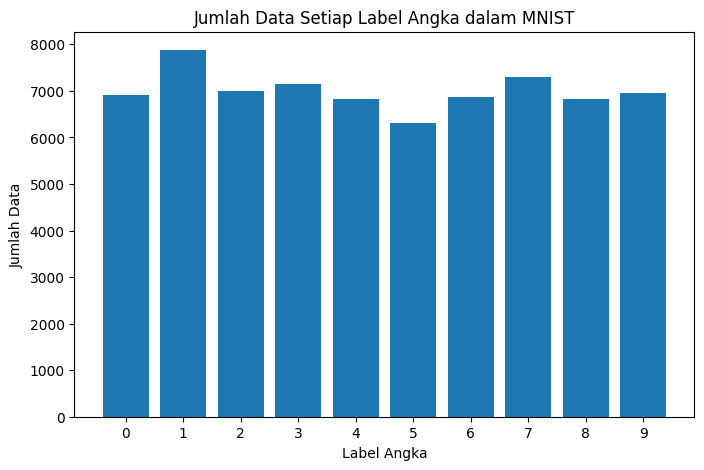

In [2]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Mengonversi data MNIST ke dalam bentuk DataFrame
df = pd.DataFrame(data=mnist.data, columns=[f'pixel_{i}' for i in range(784)])
df['target'] = mnist.target.astype(int) # Menambahkan kolom target sebagai label

# Hitung jumlah data setiap label
label_counts = df['target'].value_counts().sort_index()

# Tampilkan hasil perhitungan dengan label dan "jumlah data"
print("Label  Jumlah Data")
for label, count in label_counts.iteritems():
    print(f"{label}      {count}")

# Menampilkan grafik batang untuk visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data Setiap Label Angka dalam MNIST')
plt.xticks(label_counts.index)
plt.show()

# Balancing Data

Label  Jumlah Data Setelah Oversampling
0      7877
1      7877
2      7877
3      7877
4      7877
5      7877
6      7877
7      7877
8      7877
9      7877


<ipython-input-3-76271b337257>:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, count in label_counts_resampled.iteritems():


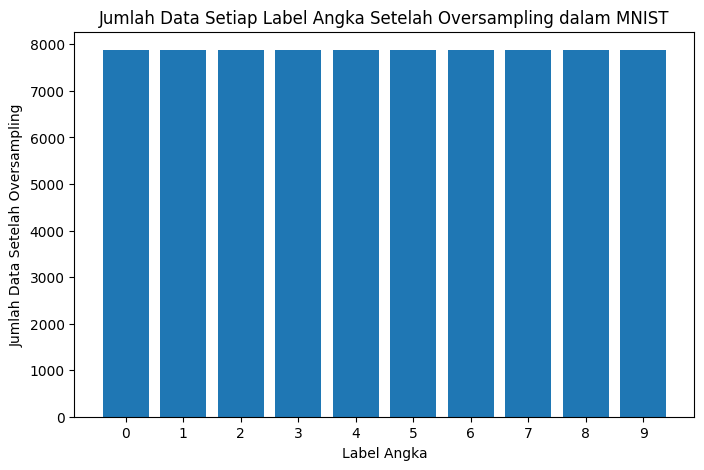

Rasio Kelas: 1.00


In [3]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split

# Hitung jumlah data setiap label
X = df.drop(columns=['target'])
y = df['target']

# Menentukan rasio oversampling untuk setiap kelas
oversampler = RandomOverSampler(random_state=42)

# Menggunakan RandomOverSampler untuk melakukan oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Menghitung jumlah data setelah oversampling
label_counts_resampled = pd.Series(y_resampled).value_counts().sort_index()

# Menampilkan hasil perhitungan dengan label dan "jumlah data" setelah oversampling
print("Label  Jumlah Data Setelah Oversampling")
for label, count in label_counts_resampled.iteritems():
    print(f"{label}      {count}")

# Menampilkan grafik batang untuk visualisasi setelah oversampling
plt.figure(figsize=(8, 5))
plt.bar(label_counts_resampled.index, label_counts_resampled.values)
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data Setelah Oversampling')
plt.title('Jumlah Data Setiap Label Angka Setelah Oversampling dalam MNIST')
plt.xticks(label_counts_resampled.index)
plt.show()

class_counts = np.bincount(y_resampled)
majority_class_count = np.max(class_counts)
minority_class_count = np.min(class_counts)

# Hitung rasio kelas
class_ratio = majority_class_count / minority_class_count

print(f"Rasio Kelas: {class_ratio:.2f}")

**Analisis Hasil**

Berdasarkan hasil di atas, terlihat bahwa dataset MNIST relatif seimbang karena jumlah data setiap label tidak memiliki perbedaan yang signifikan dimana label dari 0 hingga 9 memiliki jumlah data yang mendekati jumlah yang sama, dengan perbedaan yang cukup kecil antara jumlah data terbanyak (label 1 dengan 7,877 data) dan jumlah data terdikit (label 5 dengan 6,313 data).

Dengan demikian, dari hasil tersebut dapat disimpulkan bahwa dataset MNIST yang yang digunakan tidak mengalami ketidakseimbangan (imbalance) yang signifikan, dan dapat dilanjutkan pemodelan atau analisis lebih lanjut tanpa perlu melakukan tindakan khusus untuk mengatasi masalah ketidakseimbangan.

## 2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

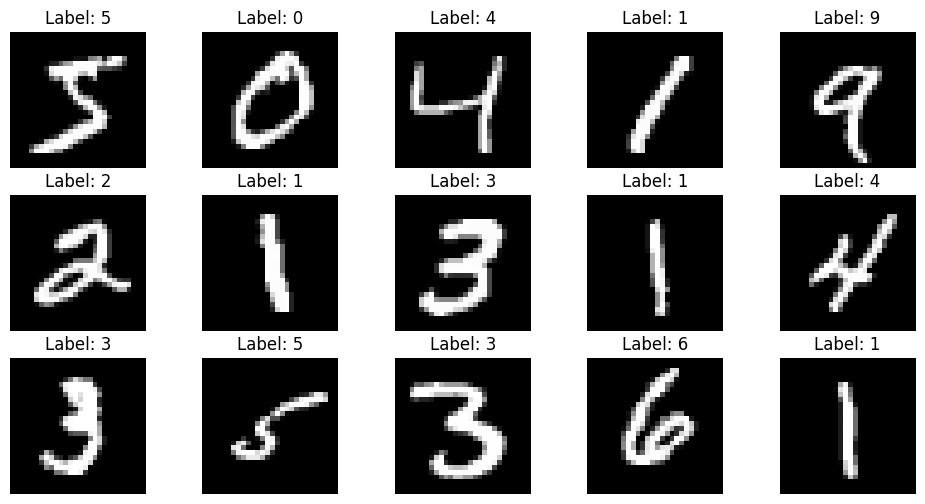

In [4]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Pisahkan fitur (X) dan target (y)
X = mnist.data
y = mnist.target.astype(int)

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.show()

## 3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
* Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
* Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.


In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi nilai piksel ke rentang 0 hingga 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Sekarang, X_train adalah matriks fitur dengan setiap baris adalah vektor fitur dari satu citra

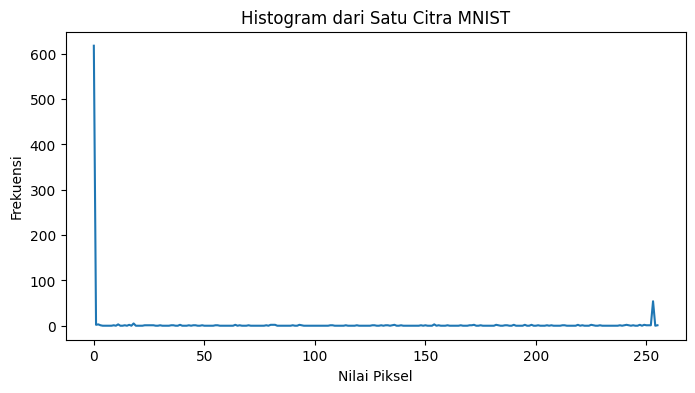

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Ambil salah satu citra sebagai contoh
sample_image = X.iloc[0].values.reshape(28, 28)  # Ambil citra pertama

# Fungsi untuk menghitung histogram citra
def compute_histogram(image):
    # Hitung histogram citra dengan 256 bin (untuk gambar grayscale)
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    return hist

# Hitung histogram dari citra contoh
sample_histogram = compute_histogram(sample_image)

# Tampilkan histogram dari citra contoh
plt.figure(figsize=(8, 4))
plt.plot(sample_histogram)
plt.title("Histogram dari Satu Citra MNIST")
plt.xlabel("Nilai Piksel")
plt.ylabel("Frekuensi")
plt.show()


## 4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = mnist.data
y = mnist.target

# Bagi dataset menjadi data latih dan data uji dengan rasio yang berbeda
# 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)
# Tampilkan ukuran setiap bagian data
print("Rasio 70:30")
print("Data Training:", X_train_70.shape, y_train_70.shape)
print("Data Testing:", X_test_70.shape, y_test_70.shape)
print("")

# 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)
print("Rasio 80:20")
print("Data Training:", X_train_80.shape, y_train_80.shape)
print("Data Testing:", X_test_80.shape, y_test_80.shape)
print("")

# 90:10
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)
print("Rasio 90:10")
print("Data Training:", X_train_90.shape, y_train_90.shape)
print("Data Testing:", X_test_90.shape, y_test_90.shape)
print("")

Rasio 70:30
Data Training: (49000, 784) (49000,)
Data Testing: (21000, 784) (21000,)

Rasio 80:20
Data Training: (56000, 784) (56000,)
Data Testing: (14000, 784) (14000,)

Rasio 90:10
Data Training: (63000, 784) (63000,)
Data Testing: (7000, 784) (7000,)



## 5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
* Anda diperbolehkan untuk melakukan tunning parameter.
* Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM

- **70:30**

Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Klasifikasi dengan Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_70, y_train_70)
y_pred_nb = naive_bayes.predict(X_test_70)
accuracy_nb = accuracy_score(y_test_70, y_pred_nb)
print("Akurasi Naive Bayes:", accuracy_nb)

Akurasi Naive Bayes: 0.550952380952381


SVM

In [9]:
# Klasifikasi dengan SVM menggunakan kernel linear
svm_linear = SVC()
svm_linear.fit(X_train_70, y_train_70)
y_pred_linear = svm_linear.predict(X_test_70)
accuracy_linear = accuracy_score(y_test_70, y_pred_linear)
print("Akurasi SVM (Linear Kernel):", accuracy_linear)

Akurasi SVM (Linear Kernel): 0.9762857142857143


- **80:20**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Klasifikasi dengan Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_80, y_train_80)
y_pred_nb = naive_bayes.predict(X_test_80)
accuracy_nb = accuracy_score(y_test_80, y_pred_nb)
print("Akurasi Naive Bayes:", accuracy_nb)

# Klasifikasi dengan SVM menggunakan kernel linear
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_80, y_train_80)
y_pred_linear = svm_linear.predict(X_test_80)
accuracy_linear = accuracy_score(y_test_80, y_pred_linear)
print("Akurasi SVM (Linear Kernel):", accuracy_linear)

Akurasi Naive Bayes: 0.5515714285714286


- **90:10**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Klasifikasi dengan Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_90, y_train_90)
y_pred_nb = naive_bayes.predict(X_test_90)
accuracy_nb = accuracy_score(y_test_90, y_pred_nb)
print("Akurasi Naive Bayes:", accuracy_nb)

# Klasifikasi dengan SVM menggunakan kernel linear
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_90, y_train_90)
y_pred_linear = svm_linear.predict(X_test_90)
accuracy_linear = accuracy_score(y_test_90, y_pred_linear)
print("Akurasi SVM (Linear Kernel):", accuracy_linear)

## 6. Evaluasi model yang Anda buat terhadap data training dan data testing. Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
* Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
* Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model Naive Bayes pada data training
y_train_pred_nb = naive_bayes.predict(X_train_70)
accuracy_train_nb = accuracy_score(y_train_70, y_train_pred_nb)
print("Akurasi Naive Bayes pada Data Training:", accuracy_train_nb)
print("Classification Report Naive Bayes pada Data Training:\n", classification_report(y_train_70, y_train_pred_nb))
print("Confusion Matrix Naive Bayes pada Data Training:\n", confusion_matrix(y_train_70, y_train_pred_nb))

# Evaluasi model Naive Bayes pada data testing
accuracy_test_nb = accuracy_score(y_test, y_pred_nb)
print("\nAkurasi Naive Bayes pada Data Testing:", accuracy_test_nb)
print("Classification Report Naive Bayes pada Data Testing:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix Naive Bayes pada Data Testing:\n", confusion_matrix(y_test, y_pred_nb))

# Evaluasi model SVM (Linear Kernel) pada data training
y_train_pred_linear = svm_linear.predict(X_train_70)
accuracy_train_linear = accuracy_score(y_train_70, y_train_pred_linear)
print("\nAkurasi SVM (Linear Kernel) pada Data Training:", accuracy_train_linear)
print("Classification Report SVM (Linear Kernel) pada Data Training:\n", classification_report(y_train_70, y_train_pred_linear))
print("Confusion Matrix SVM (Linear Kernel) pada Data Training:\n", confusion_matrix(y_train_70, y_train_pred_linear))

## 7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

- 70:30

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Membuat dan melatih model Multinomial Naive Bayes
mnb2 = MultinomialNB()
mnb2.fit(X_train_70, y_train_70)

# Pilih beberapa contoh citra dari data pengujian
num_samples = 5  # Ganti jumlah contoh yang ingin ditampilkan sesuai kebutuhan

# Membuat layout subplot horizontal
fig, axs = plt.subplots(1, num_samples, figsize=(15, 4))

for i in range(num_samples):
    sample_index = np.random.randint(len(X_test_70))
    sample_image = X_test_70[sample_index]
    true_label = y_test_70[sample_index]

    # Prediksi dengan model Multinomial Naive Bayes
    nb_prediction = mnb2.predict([sample_image])[0]

    # Menampilkan citra pengujian dan hasil prediksi
    axs[i].imshow(np.reshape(sample_image, (28, 28)), cmap='gray')
    axs[i].set_title(f"Label Asli: {true_label}\nLabel Prediksi: {nb_prediction}")
    axs[i].axis('off')

plt.show()

SVM

In [ ]:
# 7

import matplotlib.pyplot as plt
import numpy as np

# Pilih beberapa contoh citra dari data testing
sample_indices = np.random.choice(len(X_test_70), 5)  # Ubah 5 menjadi jumlah contoh yang ingin ditampilkan
sample_images = X_test_70[sample_indices]
sample_labels = y_pred_linear[sample_indices]

# Label asli dari contoh-contoh ini
true_labels = y_test_70[sample_indices]

# Menampilkan citra dan hasil pelabelannya
plt.figure(figsize=(12, 6))
for i, (image, predicted_label, true_label) in enumerate(zip(sample_images, sample_labels, true_labels)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f'Prediksi: {predicted_label}\nAsli: {true_label}')
    plt.axis('off')
plt.show()

## 8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!